# Purpose Of Notebook:

This notebook will work through the data science process after collecting the data (which was done in a previous step, and can be found in the *data_scraper.py* and *data_collection.py* files. 

We will first go through and get a sense of what sort of data we collected. From there I'll do an initial clean on the features I already know will cause some issues in the EDA step. 

Then I'll explore the data visually and see if I can uncover any patterns. Once the data has been thoroughly explored I'll create a custom transformation class which will be able to handle any transformations to the data, before going through and testing/selecting the best model.

## Table Of Contents:


### [Import Libraries](#Imports)

### [Read in the previously collected data](#Read-in-the-data)

### [Creating the train/test split](#Train-test-split)

### [Initial cleaning of features](#Initial-cleaning)

### [Exploratory Data Analysis](#EDA)

### [Export Train & Test Sets](#Export-data-sets)

### Imports

Necessary libraries for the project.

In [2]:
# Data Analysis
import numpy as np
import pandas as pd
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

# Styles
sns.set_style('darkgrid')
sns.set_palette('Set2')

### Read in the data

Since we have previously scraped our data to a CSV file *(using the data_scraper.py and data_collection.py files)*, we can simply read that file into this notebook to begin working with it.

In [3]:
# Read in data
data = pd.read_csv('skaters.csv')
data.head(3)

,season,team,name,birthday,age,nationality,height,weight,number,rookie,...,goals,pim,shots,shot_perc,games,hits,blocked,plusminus,shifts,points
0,20082009,New Jersey Devils,Travis Zajac,1985-05-13,35,CAN,"6' 2""",185,19,False,...,20,29,185,10.81,82,59,40,33,1895,62
1,20082009,New York Islanders,Johnny Boychuk,1984-01-19,36,CAN,"6' 2""",227,55,False,...,0,0,0,0.00,1,3,1,0,20,0
2,20082009,New York Islanders,Andrew Ladd,1985-12-12,34,CAN,"6' 3""",192,16,False,...,15,28,195,7.69,82,117,22,26,1803,49


In [4]:
# View info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 30 columns):
season            3612 non-null int64
team              3612 non-null object
name              3612 non-null object
birthday          3612 non-null object
age               3612 non-null int64
nationality       3612 non-null object
height            3612 non-null object
weight            3612 non-null int64
number            3612 non-null int64
rookie            3612 non-null bool
position_code     3612 non-null object
position_type     3612 non-null object
captain           3612 non-null bool
alternate_capt    3612 non-null bool
handedness        3612 non-null object
toi               3612 non-null object
pp_toi            3612 non-null object
sh_toi            3612 non-null object
ev_toi            3612 non-null object
assists           3612 non-null int64
goals             3612 non-null int64
pim               3612 non-null int64
shots             3612 non-null int64
shot_perc 

In [5]:
# Describe data
data.describe()

,season,age,weight,number,assists,goals,pim,shots,shot_perc,games,hits,blocked,plusminus,shifts,points
count,3.612000e+03,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000
mean,2.015050e+07,29.532115,201.444352,35.574474,18.464286,11.005537,30.476744,115.658915,8.373931,60.304540,75.400609,49.226467,0.941030,1366.592746,29.469823
std,2.823489e+04,3.922161,15.266395,27.081459,14.339520,10.120075,25.510675,74.787930,6.302526,25.307584,59.100301,42.510652,11.510202,667.595695,22.716278
min,2.008201e+07,20.000000,153.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-42.000000,5.000000,0.000000
25%,2.013201e+07,27.000000,191.000000,14.000000,7.000000,3.000000,13.000000,58.000000,4.350000,48.750000,32.000000,20.000000,-6.000000,924.250000,11.000000
50%,2.016202e+07,29.000000,200.000000,25.000000,16.000000,8.000000,26.000000,112.000000,8.180000,72.000000,63.000000,36.000000,0.000000,1539.500000,25.000000
75%,2.017202e+07,32.000000,211.000000,55.000000,27.000000,17.000000,42.000000,167.000000,11.812500,80.000000,106.000000,68.000000,8.000000,1858.500000,44.000000
max,2.018202e+07,43.000000,255.000000,98.000000,87.000000,60.000000,232.000000,528.000000,100.000000,84.000000,382.000000,283.000000,49.000000,2730.000000,128.000000


In [6]:
# Describe including non-numeric data
data.describe(include='O')

,team,name,birthday,nationality,height,position_code,position_type,handedness,toi,pp_toi,sh_toi,ev_toi
count,3612,3612,3612,3612,3612,3612,3612,3612,3612,3612,3612,3612
unique,31,702,648,17,17,4,2,2,3561,2884,2578,3524
top,New York Islanders,Jonathan Toews,1987-01-13,CAN,"6' 1""",D,Forward,L,1124:05,00:00,00:00,967:34
freq,151,10,20,1703,732,1319,2293,2221,2,109,208,4


I can see that we have data for 702 different players, across 31 teams.

I already know that there are some transformations that I will need to make **prior** to the EDA step. This is because the data types are wrong, or some characters will need to be stripped out in order to be able to plot.

These transformations will go into my custom transformation class which I create below so that they can all be done simultaneously. 

### Train test split

I'll split the data out here so we can just explore the training data. I don't want to fit any transformers to test data, or taint it in any way. 

For this project, I will aim to predict the points per player for the most recent season of data that I have (2018/2019 season). Therefore I will use all previous seasons as training data.

In [7]:
# Create the train/test split
data_train = data[data['season'] != 20182019]
data_test = data[data['season'] == 20182019]

# Check proportions
print(f'Proportion of training data: {round(len(data_train)/len(data),2)*100}%')
print(f'Proportion of testing data: {round(len(data_test)/len(data),2)*100}%')

Proportion of training data: 81.0%
Proportion of testing data: 19.0%


### Initial cleaning

There were some features that came in as a different format than expected from the scraper. These will make the EDA more difficult as I won't be able to accurately plot anything or explore true correlations.

There were also some features that I knew would be key, but were not readily/easily accessible using the NHL API. So I will create those first as well before moving into EDA. These are: Conference, Division, Birth Month and Birth Season (fall, winter, etc.).

1) [**Cleaning Age:**](#Age) The age column that was scraped is the players current age (at time of scraping). This will likely not be very useful when predicting points; what I was hoping to scrape out was the players age at the start of the season. Luckily, there are 2 columns that I can manipulate to arrive at this new feature. I'll have to assume that each season starts on October 1st every year (most start sometime early Oct), and simply take the difference in years between the players birthday and the date the season started.

2) [**Cleaning Height:**](#Height) This was gathered as feet' inches" and transformed into an object datatype. While this makes sense to read, it will not be useful for a machine learning model. I'll therefore need to strip out all the extra characters and transform it into one number (inches) which can represent a players height.

3) [**Cleaning Bools:**](#Converting-bools) There are a few features that came in as boolean values. I am not 100% sure if/how these will affect a machine learning model, however for the purposes of EDA I will just convert these to string values to make them easier to plot.

4) [**Cleaning Time on ice:**](#Time-on-ice) The time on ice measures came in the form of minutes:seconds. For the purposes of this project I will perform a similar calculation as I did for height, and convert these numbers to only seconds - representing how many total seconds a player was on the ice for.

5) [**Creating Feature: Presence of letter?**](#Combining-the-letter-features) I knew I wanted this feature before even building the NHL scraper. However unfortunately this wasn't available directly from the API. Therefore I needed to scrape out the componenets which would help me build this calculation. This new field will simply tell me whether or not the player has a letter on their jersey or not (C for Captain, A for Alternate Captain), rather than splitting these features out.

6) [**Creating Features: Division & Conference**](#Creating-division-&-conference-features) These were other features that I knew would be valuable, however weren't easily accessible through the API. I'll use a simple dictionary which I created to map each individual team to their division & conference.



8) [**Creating Feature: Birth Month**](#Creating-birth-month-feature) I knew that the actual birthday wouldn't provide much value for this model. However was interested in seeing if players born in a given month/season typically performed better than others.


9) [**Creating Feature: Birth Season**](#Creating-birth-season-feature) This idea came right from the previous; and I used a custom dictionary to look up the birth month and map it to a season.

##### Age

In [8]:
# Create season start feature and transform that and birthday to DATETIMES
data_train['season_start'] = data_train['season'].apply(lambda x: pd.to_datetime(f"{str(x)[:4]}-10-01"))
data_train['birthday'] = data_train['birthday'].apply(lambda x: pd.to_datetime(str(x)))

# Find difference between dates, ÷ by 365 to get years and transform to INTEGER
data_train['age_season_start'] = round((data_train['season_start'] - data_train['birthday']).dt.days/365).astype(int)

# Test new calculated field
data_train[data_train['name'] == 'P.K. Subban'][['season','name','season_start','birthday','age_season_start']]

,season,name,season_start,birthday,age_season_start
108,20092010,P.K. Subban,2009-10-01,1989-05-13,20
247,20102011,P.K. Subban,2010-10-01,1989-05-13,21
423,20112012,P.K. Subban,2011-10-01,1989-05-13,22
642,20132014,P.K. Subban,2013-10-01,1989-05-13,24
957,20142015,P.K. Subban,2014-10-01,1989-05-13,25
1326,20152016,P.K. Subban,2015-10-01,1989-05-13,26
1788,20162017,P.K. Subban,2016-10-01,1989-05-13,27
2325,20172018,P.K. Subban,2017-10-01,1989-05-13,28


##### Height

In [9]:
# Split feet' inches" to componenets and convert to total inches
data_train['inches'] = data_train['height'].apply(lambda x: (int(x[0])*12) + int(x.split(' ')[1].replace('"','')))

# Test new calculated field
data_train[data_train['name'] == 'P.K. Subban'][['name','height','inches']]

,name,height,inches
108,P.K. Subban,"6' 0""",72
247,P.K. Subban,"6' 0""",72
423,P.K. Subban,"6' 0""",72
642,P.K. Subban,"6' 0""",72
957,P.K. Subban,"6' 0""",72
1326,P.K. Subban,"6' 0""",72
1788,P.K. Subban,"6' 0""",72
2325,P.K. Subban,"6' 0""",72


##### Converting bools

In [10]:
# Convert to STRING
data_train['rookie'] = data_train['rookie'].astype(str)
data_train['captain'] = data_train['captain'].astype(str)
data_train['alternate_capt'] = data_train['alternate_capt'].astype(str)

##### Time on ice

In [11]:
# Convert TOI measures to minutes
data_train['toi_secs'] = data_train['toi'].apply(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1]))
data_train['pp_toi_secs'] = data_train['pp_toi'].apply(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1]))
data_train['sh_toi_secs'] = data_train['sh_toi'].apply(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1]))
data_train['ev_toi_secs'] = data_train['ev_toi'].apply(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1]))

# Test new calculated field
data_train[data_train['name'] == 'P.K. Subban'][['name','toi','toi_secs','pp_toi','pp_toi_secs',
                                                 'sh_toi','sh_toi_secs', 'ev_toi','ev_toi_secs']]

,name,toi,toi_secs,pp_toi,pp_toi_secs,sh_toi,sh_toi_secs,ev_toi,ev_toi_secs
108,P.K. Subban,40:12,2412,08:27,507,00:56,56,30:49,1849
247,P.K. Subban,1714:41,102881,237:15,14235,195:27,11727,1281:59,76919
423,P.K. Subban,1968:28,118108,283:04,16984,211:42,12702,1473:42,88422
642,P.K. Subban,2018:32,121112,382:16,22936,55:02,3302,1581:14,94874
957,P.K. Subban,2148:40,128920,302:12,18132,177:17,10637,1669:11,100151
1326,P.K. Subban,1792:38,107558,313:51,18831,159:26,9566,1319:21,79161
1788,P.K. Subban,1610:40,96640,172:00,10320,137:57,8277,1300:43,78043
2325,P.K. Subban,1977:24,118644,253:23,15203,217:01,13021,1507:00,90420


##### Combining the letter features


In [12]:
# Set feature equal to YES if they are a Captain
data_train['letter'] = data_train['captain'].apply(lambda x: 'Yes' if x == 'True' else 'No')

# For remaining rows (NO), change value to YES if they are an Alternate
data_train['letter'] = data_train[data_train['letter']=='No']['alternate_capt'].apply(lambda x: 'Yes' if x=='True' 
                                                                                      else 'No')
# Fill nulls (Captains) back to YES
data_train['letter'].fillna('Yes', inplace=True)

# Test new calculated field
data_train[(data_train['name'] == 'Mitchell Marner')][['name','captain','alternate_capt','letter']]

,name,captain,alternate_capt,letter
1949,Mitchell Marner,False,True,Yes
2513,Mitchell Marner,False,True,Yes


##### Creating division & conference features

In [13]:
# Data dictionary to hold conference and division for each team
team_info = {'New Jersey Devils':{'Conference':'Eastern','Division':'Metropolitan'},
             'New York Islanders':{'Conference':'Eastern', 'Division':'Metropolitan'},
             'New York Rangers':{'Conference':'Eastern', 'Division':'Metropolitan'},
             'Philadelphia Flyers':{'Conference':'Eastern', 'Division':'Metropolitan'}, 
             'Pittsburgh Penguins':{'Conference':'Eastern', 'Division':'Metropolitan'},
             'Boston Bruins':{'Conference':'Eastern', 'Division':'Atlantic'},
             'Buffalo Sabres':{'Conference':'Eastern', 'Division':'Atlantic'},
             'Montréal Canadiens':{'Conference':'Eastern', 'Division':'Atlantic'}, 
             'Ottawa Senators':{'Conference':'Eastern', 'Division':'Atlantic'},
             'Toronto Maple Leafs':{'Conference':'Eastern', 'Division':'Atlantic'},
             'Carolina Hurricanes':{'Conference':'Eastern', 'Division':'Metropolitan'},
             'Florida Panthers':{'Conference':'Eastern', 'Division':'Atlantic'},
             'Tampa Bay Lightning':{'Conference':'Eastern', 'Division':'Atlantic'},
             'Washington Capitals':{'Conference':'Eastern', 'Division':'Metropolitan'},
             'Chicago Blackhawks':{'Conference':'Western', 'Division':'Central'},
             'Detroit Red Wings':{'Conference':'Eastern', 'Division':'Atlantic'},
             'Nashville Predators':{'Conference':'Western', 'Division':'Central'},
             'St. Louis Blues':{'Conference':'Western', 'Division':'Central'},
             'Calgary Flames':{'Conference':'Western', 'Division':'Pacific'},
             'Edmonton Oilers':{'Conference':'Western', 'Division':'Pacific'},
             'Vancouver Canucks':{'Conference':'Western', 'Division':'Pacific'},
             'Anaheim Ducks':{'Conference':'Western', 'Division':'Pacific'},
             'Dallas Stars':{'Conference':'Western', 'Division':'Central'},
             'Los Angeles Kings':{'Conference':'Western', 'Division':'Pacific'},
             'San Jose Sharks':{'Conference':'Western', 'Division':'Pacific'},
             'Columbus Blue Jackets':{'Conference':'Eastern', 'Division':'Metropolitan'},
             'Minnesota Wild':{'Conference':'Western', 'Division':'Central'},
             'Winnipeg Jets':{'Conference':'Western', 'Division':'Central'},
             'Arizona Coyotes':{'Conference':'Western', 'Division':'Pacific'},
             'Vegas Golden Knights':{'Conference':'Western', 'Division':'Pacific'},
             'Colorado Avalanche':{'Conference':'Western', 'Division':'Central'}}

# Look up team in custom built data dictionary
data_train['conference'] = data_train['team'].apply(lambda x: team_info[x]['Conference'])
data_train['division'] = data_train['team'].apply(lambda x: team_info[x]['Division'])

# Test new calculated field
data_train[data_train['name'] == 'P.K. Subban'][['team','conference','division']]

,team,conference,division
108,New Jersey Devils,Eastern,Metropolitan
247,New Jersey Devils,Eastern,Metropolitan
423,New Jersey Devils,Eastern,Metropolitan
642,New Jersey Devils,Eastern,Metropolitan
957,New Jersey Devils,Eastern,Metropolitan
1326,New Jersey Devils,Eastern,Metropolitan
1788,New Jersey Devils,Eastern,Metropolitan
2325,New Jersey Devils,Eastern,Metropolitan


##### Creating birth month feature

In [14]:
# Convert birth month to 'MMM' format and put in new column
data_train['birth_month'] = data_train['birthday'].apply(lambda x: datetime.datetime.strftime(x, '%b'))

# Test new calculated field
data_train[data_train['name'] == 'Auston Matthews'][['name','birthday','birth_month']]

,name,birthday,birth_month
1952,Auston Matthews,1997-09-17,Sep
2516,Auston Matthews,1997-09-17,Sep


##### Creating birth season feature

In [15]:
# Create custom dictionary to map month to season
birthday_season = {'Jan':'Winter' , 'Feb':'Winter', 'Mar':'Spring', 'Apr':'Spring', 
                   'May':'Spring', 'Jun':'Summer', 'Jul':'Summer', 'Aug':'Summer', 
                   'Sep':'Fall', 'Oct':'Fall', 'Nov':'Fall', 'Dec':'Winter'}

# Look up birth month in dictionary and map to season
data_train['birth_season'] = data_train['birth_month'].apply(lambda x: birthday_season[x])

# Test new calculated field
data_train[data_train['name'] == 'Mitchell Marner'][['name','birthday','birth_month', 'birth_season']]

,name,birthday,birth_month,birth_season
1949,Mitchell Marner,1997-05-05,May,Spring
2513,Mitchell Marner,1997-05-05,May,Spring


In [16]:
# Check info and types again
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2933 entries, 0 to 2932
Data columns (total 42 columns):
season              2933 non-null int64
team                2933 non-null object
name                2933 non-null object
birthday            2933 non-null datetime64[ns]
age                 2933 non-null int64
nationality         2933 non-null object
height              2933 non-null object
weight              2933 non-null int64
number              2933 non-null int64
rookie              2933 non-null object
position_code       2933 non-null object
position_type       2933 non-null object
captain             2933 non-null object
alternate_capt      2933 non-null object
handedness          2933 non-null object
toi                 2933 non-null object
pp_toi              2933 non-null object
sh_toi              2933 non-null object
ev_toi              2933 non-null object
assists             2933 non-null int64
goals               2933 non-null int64
pim                 2933 non-n

### EDA

Now that we spent some time going through the training data set and adding some features that I wanted right from the beginning, and cleaning up some of the data types, we now have a better/more interesting set of data with which to perform some exploratory data analysis.

I will split this EDA up into it's component pieces. First plotting features individually to try and see the distributions and averages etc. From there I will move into bivariate analysis where I plot some of the more interesting features against the target variable (POINTS) to see if any patterns emerge.

1 [**Categorical plot takeaways**](#Categorical-plots) There weren't any real interesting patterns in these distributions that jumped out straight away, however some things that are easy to see now in these visuals are:
- The majority of the data comes from teams in the Central division
- Most players in the training data were born in July, and the lowest accounted for month is September
- Most observations are for defensemen, which makes sense since 40% of the players on the ice at a time are defense (2 of 5), and the other 3 positions have their own codes
- The team that is represented the least are the New Jersey Devils; this might be because they had the most number of players retire from 2008 through 2018. We know that only currently active players are contained in the NHL API which further backs up this hypothesis.

2 [**Numeric plot takeaways**](#Numeric-plots)
- A lot of the plots, including the target variable are positively skewed. I will need to keep this in mind as I may need to transform them before passing them into the models
- The average points per season is just under 30
- There are more normally distributed features than originally expected. These include: height, weight, age at season start and plusminus.


3 [**Plotting various features against Points**](#Bivariate-plots)

-[Correlations](#Correlations:)

- <u>*Correlations with target variable:*</u> A strong correlation is typically anything over about 0.6. And right away I can see some of the strongest correlations with the target variable are: Total time on ice, Powerplay time on ice, Games, Shifts & Shots. These features make a lot of sense as they all tell us how long a player is on the ice for, and how many opportunities they have to generate good scoring chances.


- <u>*Correlations among independent variables:*</u> There are some features that are strongly correlated with eachother. I'll need to keep these in mind as for some of the algorithms I will be using I'll need to remove some, so that we don't have features in the model that are correlated with eachother.
    - Time on Ice Seconds & Shifts - Correlation of 0.98: Very strong correlation and again makes sense. More shifts is directly related to time on ice.
    - Shifts & Games - Correlation of 0.93: These are very strongly correlated and makes sense. The more games a player plays in, the more shifts they would have as well.
    - Time on Ice Seconds & Games - Correlation of 0.9: Similarly to shifts & games, the more games a player is involved in the more time they'll spent on ice.
    - Time on Ice Seconds & Shots - Correlation of 0.78: The more time spent on ice, the more opportunities they have for shots.
    - Shifts & Shots - Correlation of 0.76: The more shifts a player has, the more opportuntiies for shots.
    - Games & Shots - Correlation of 0.76: The more games a player plays, the more opportunities they have for shots on net
    - Inches & Weight - Correlation of 0.73: Both relate to a players size
    - Time on Ice Seconds & Blocked - Correlation of 0.68: Similarly to blocks vs shifts, the more a player is on the ice the higher the chance they'll block shots.
    - Shifts & Blocked - Correlation of 0.67: Blocks being part of the game, this also makes sense. As more shifts generally translates to more blocked shots.
    - Hits & PIMS - Correlation of 0.65: Generally the players who have more hits and play a more physical game are more likely to take more penalties.
    - Hits & Games - Correlation of 0.51: Similar to above, the more games a player plays, the more hits they will have as this is a part of the game.  
   
Since all of the time on ice measures are pretty related to eachother, I will likely end up just going with one of them. The TOI measure strongly related to the target variable is the PowerPlay TOI.

-[Categorical features vs Target](#Categorical-features-vs-target) Some interesting things of note looking at these plots is the fact that players born in Summer & Fall tend to have more points, whereas players born in the Fall generally have the fewest. Players with a letter on their jersey, and players who are not rookies also have higher average points. 

##### Categorical plots

In [17]:
# Select categorical features to plot
categorical = ['letter','conference','division','birth_month','birth_season', 'handedness', 
               'position_type', 'position_code', 'rookie', 'nationality', 'team']

# Create a new categorical only dataframe for plotting purposes
df_cat = data_train[categorical]
df_cat.head(3)

,letter,conference,division,birth_month,birth_season,handedness,position_type,position_code,rookie,nationality,team
0,Yes,Eastern,Metropolitan,May,Spring,R,Forward,C,False,CAN,New Jersey Devils
1,No,Eastern,Metropolitan,Jan,Winter,R,Defenseman,D,False,CAN,New York Islanders
2,No,Eastern,Metropolitan,Dec,Winter,L,Forward,L,False,CAN,New York Islanders


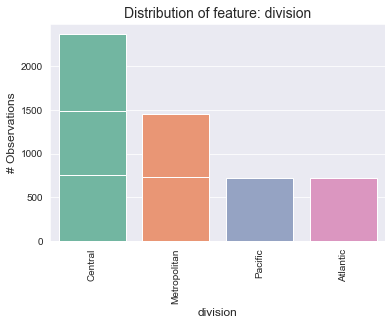

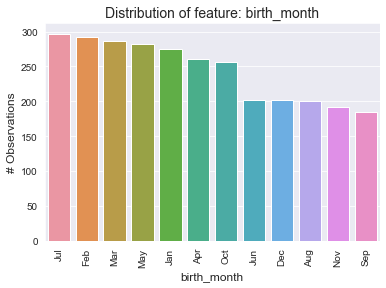

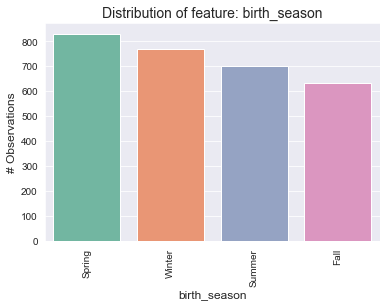

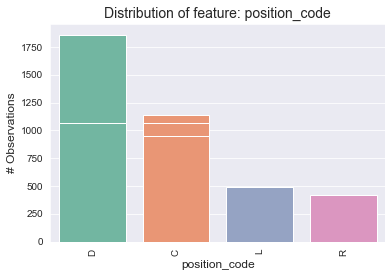

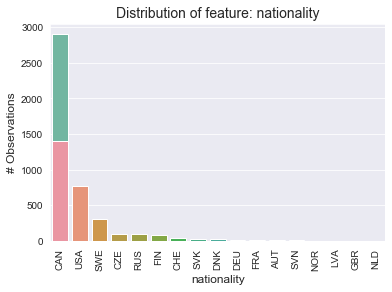

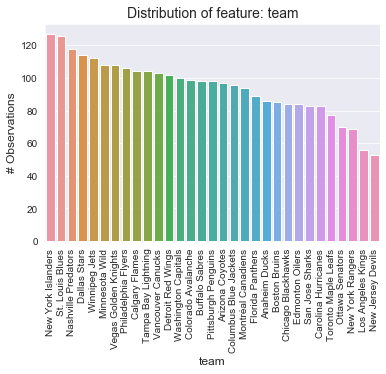

In [18]:
# Loop through and plot categorical features
for feature in df_cat.columns:
    sns.countplot(data=df_cat, x = feature, order = df_cat[feature].value_counts().index)
    plt.title(f'Distribution of feature: {feature}', fontsize=14)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.ylabel('# Observations', fontsize=12)
    
    if df_cat[feature].nunique() >= 4:
        plt.xticks(rotation=90)
    else:
        continue
    plt.show();


##### Numeric plots

In [19]:
# Select categorical features to plot
numeric = ['points', 'number', 'age_season_start', 'inches', 'weight', 'games', 'shots', 
           'shot_perc', 'hits', 'blocked', 'pim', 'plusminus', 'shifts', 'toi_secs', 
           'pp_toi_secs', 'sh_toi_secs', 'ev_toi_secs', ]

# Create a new categorical only dataframe for plotting purposes
df_num = data_train[numeric]
df_num.head(3)

,points,number,age_season_start,inches,weight,games,shots,shot_perc,hits,blocked,pim,plusminus,shifts,toi_secs,pp_toi_secs,sh_toi_secs,ev_toi_secs
0,62,19,23,74,185,82,185,10.81,59,40,29,33,1895,91747,16096,9853,65798
1,0,55,25,74,227,1,0,0.00,3,1,0,0,20,888,48,34,806
2,49,16,23,75,192,82,195,7.69,117,22,28,26,1803,70821,1808,4718,64295


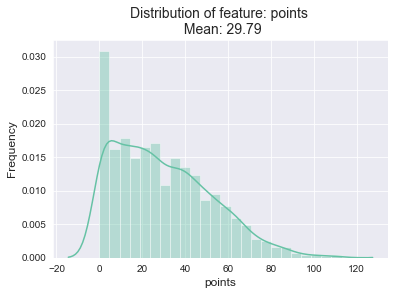

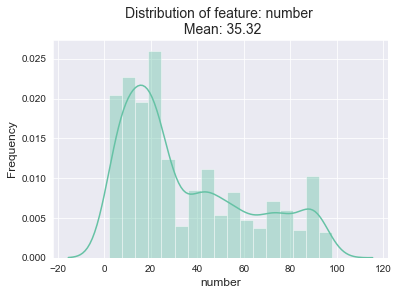

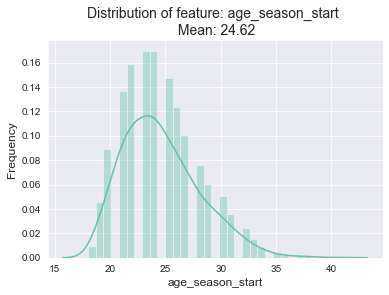

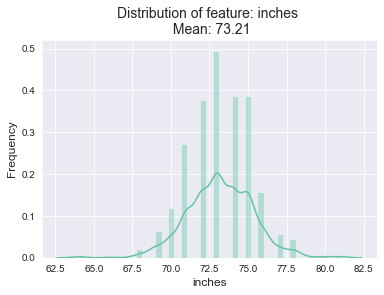

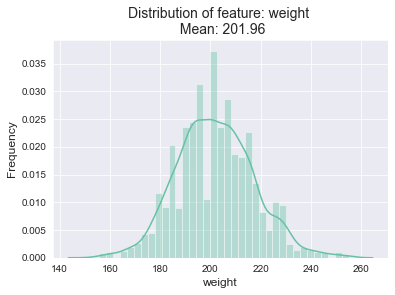

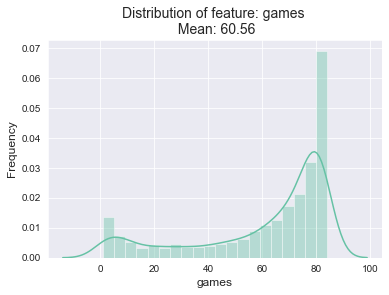

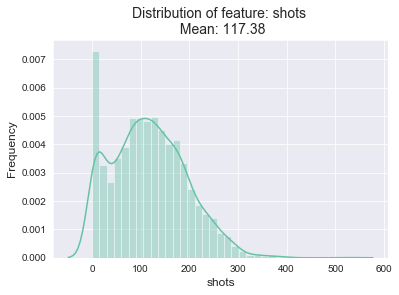

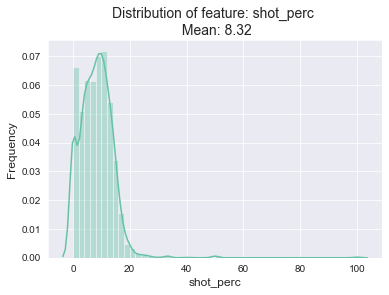

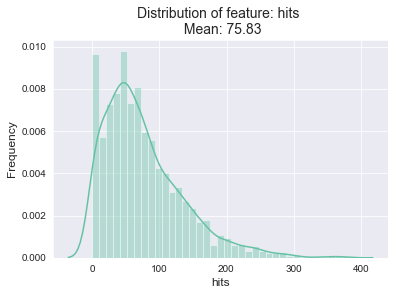

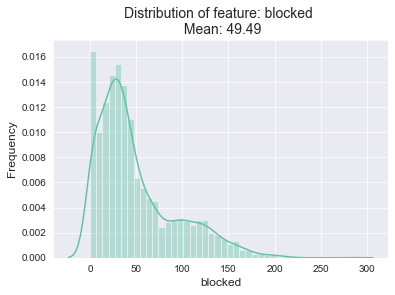

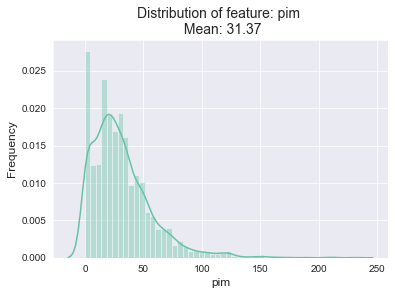

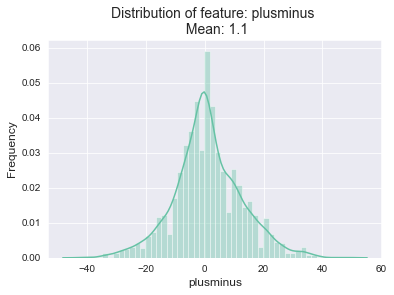

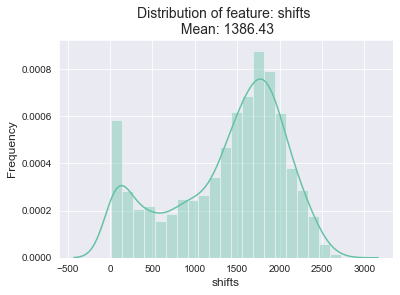

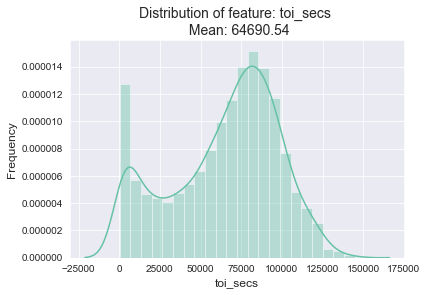

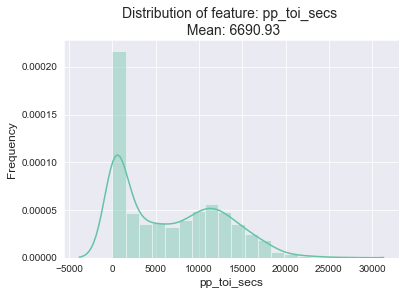

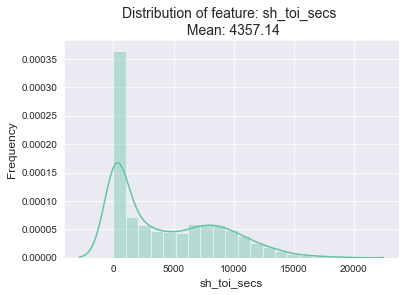

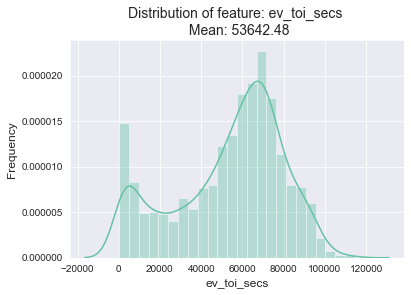

In [20]:
# Loop through and plot numeric features
for feature in df_num.columns:
    round_mean = round(df_num[feature].mean(),2) 
    sns.distplot(df_num[feature])
    plt.title(f'Distribution of feature: {feature} \n Mean: {round_mean}', fontsize=14)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show();

##### Bivariate plots

##### Correlations:

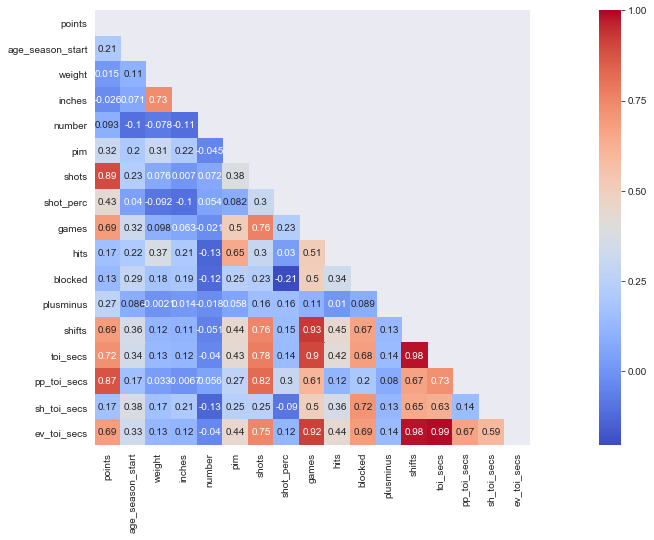

In [21]:
# Correlation heatmap with select features
corr_map = data_train[['points', 'age_season_start', 'weight', 'inches', 'number', 'pim', 'shots', 
                       'shot_perc', 'games', 'hits', 'blocked', 'plusminus', 'shifts', 'toi_secs', 
                       'pp_toi_secs','sh_toi_secs', 'ev_toi_secs']].corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_map, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_map, mask=mask, cmap='coolwarm', square=True, annot = True)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t); # update the ylim(bottom, top) values

##### Categorical features vs target

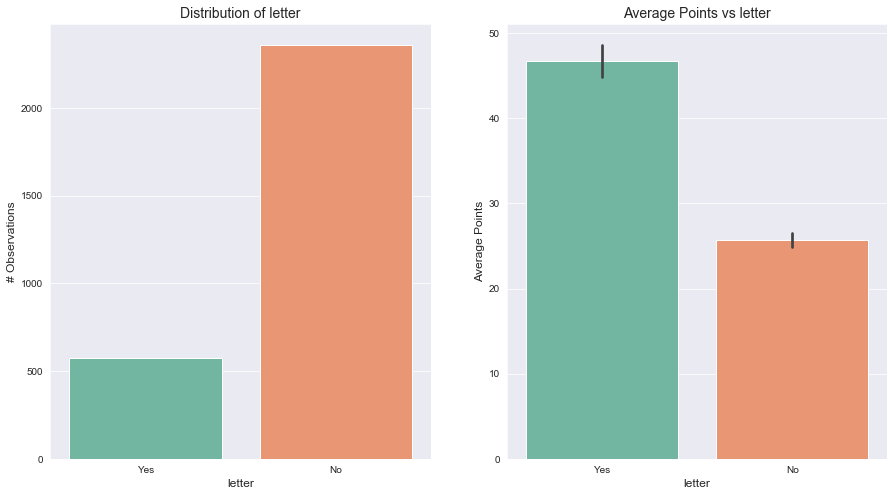

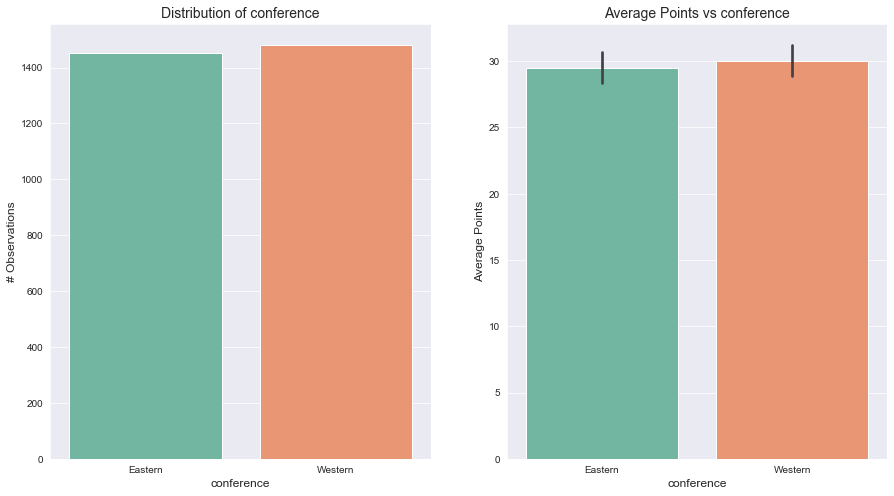

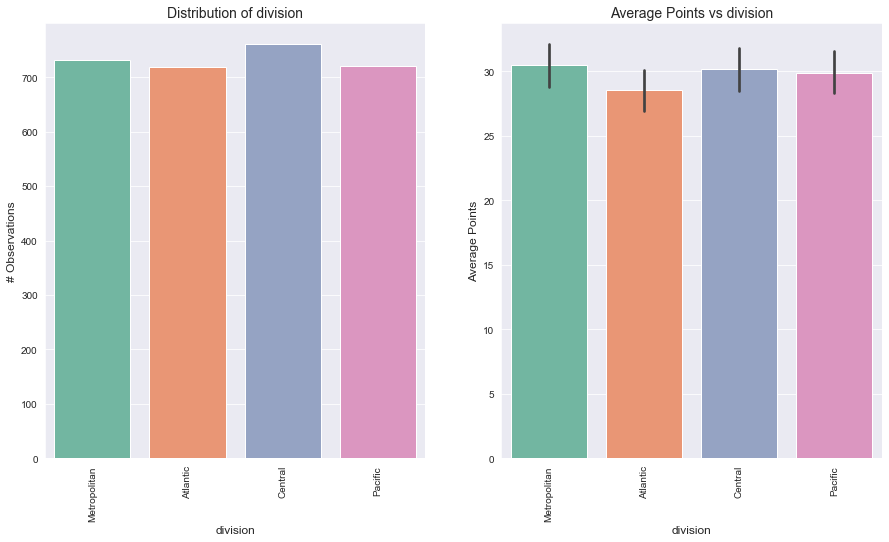

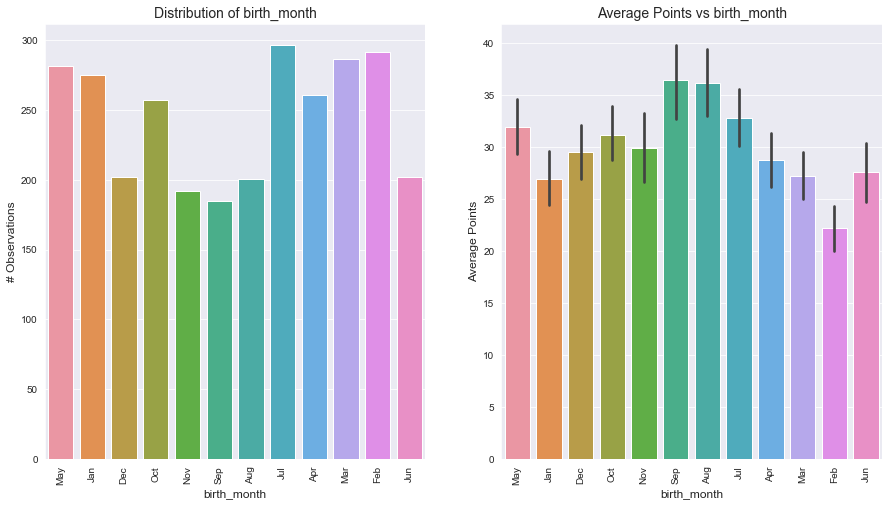

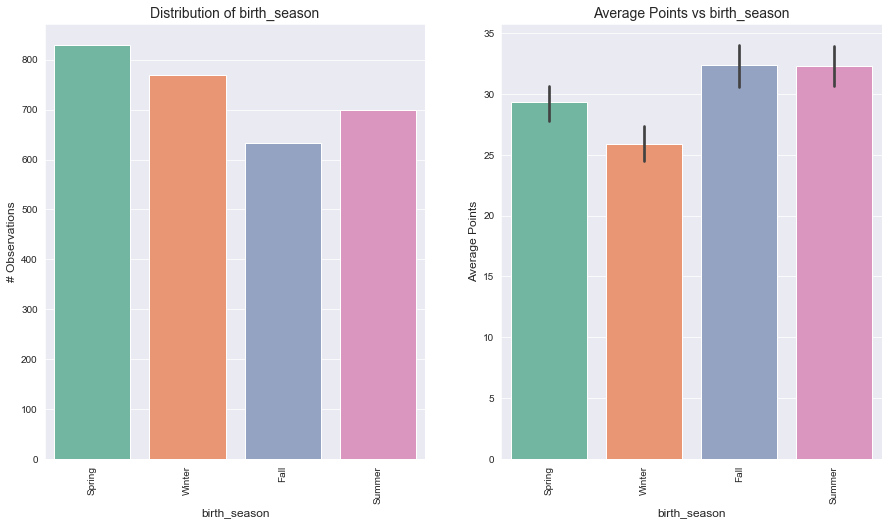

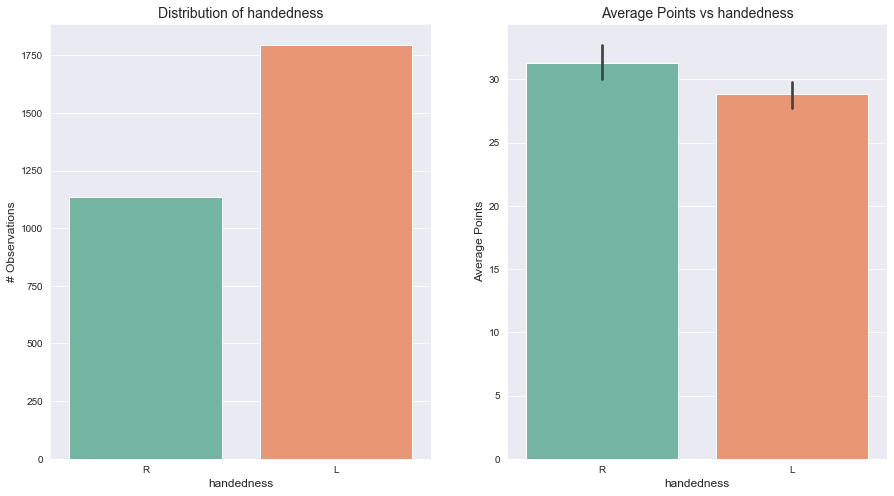

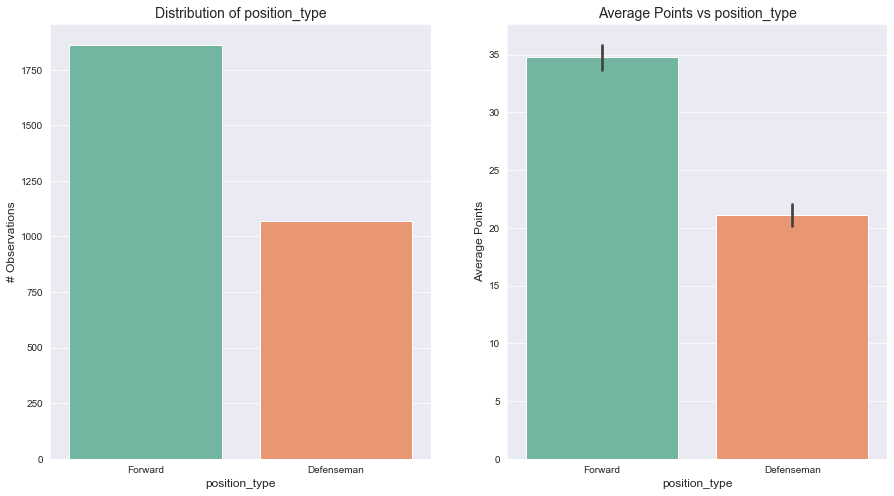

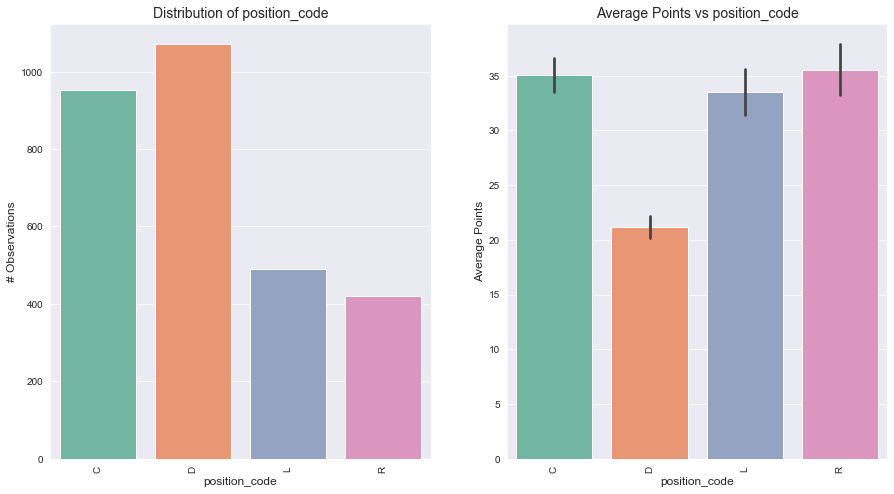

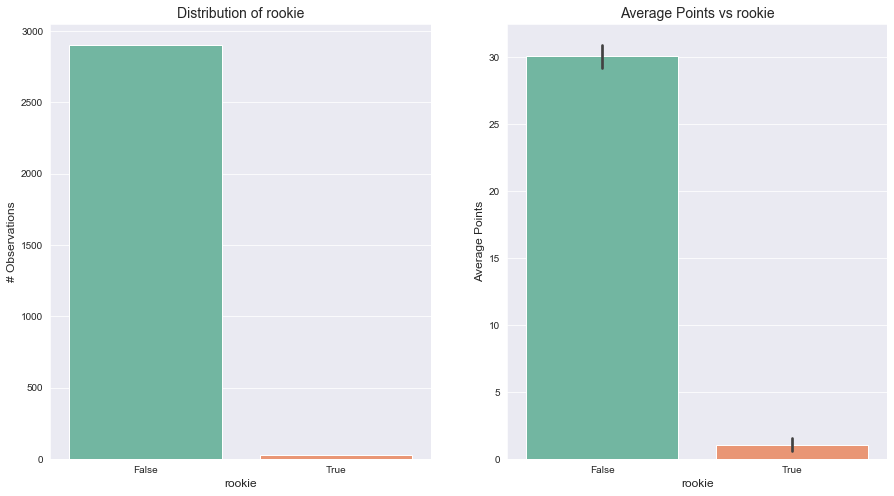

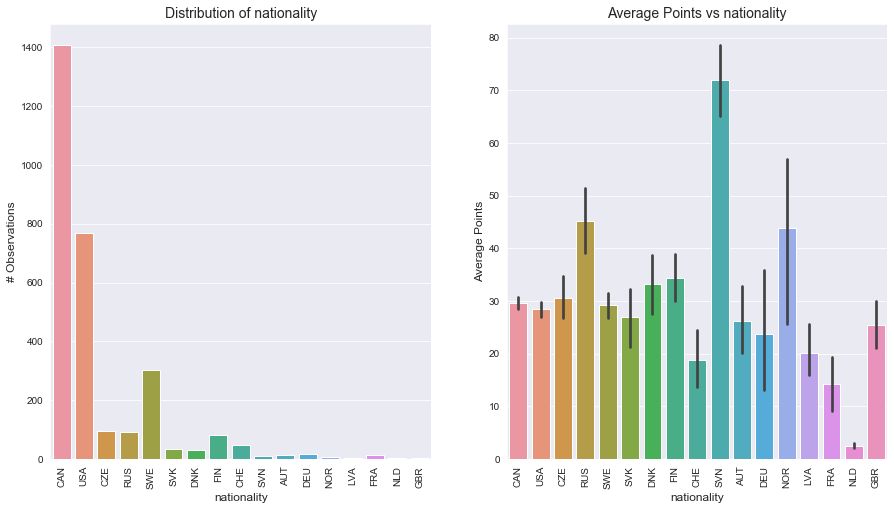

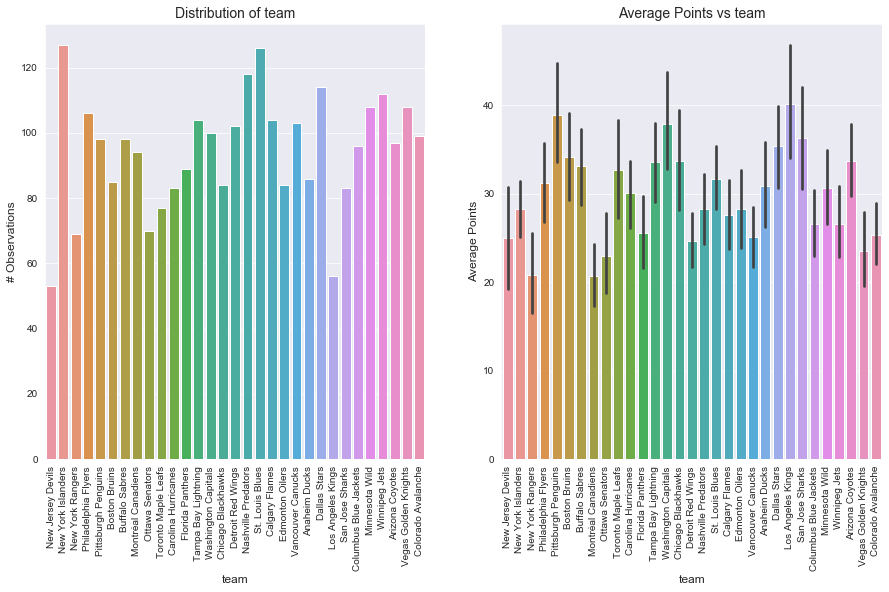

In [22]:
# Create DF to loop through to plot features against points
df_plot = data_train[['letter','conference','division','birth_month','birth_season', 'handedness', 
               'position_type', 'position_code', 'rookie', 'nationality', 'team', 'points']]


for feature in df_plot.columns:

    if feature != 'points':
        plt.figure(figsize=(15,8))

        # Plot Distribution
        plt.subplot(1,2,1)
        sns.countplot(df_plot[feature])
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('# Observations', fontsize=12)
        plt.title(f'Distribution of {feature}', fontsize=14);
        if df_plot[feature].nunique() >= 4:
            plt.xticks(rotation=90)

        # Plot mean points for each
        plt.subplot(1,2,2)
        sns.barplot(x = feature, y='points', data = df_plot)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Average Points', fontsize=12)
        plt.title(f'Average Points vs {feature}', fontsize=14);
        if df_plot[feature].nunique() >= 4:
            plt.xticks(rotation=90)
    else:
        continue

### Export data sets

Here I will export the seperated data sets so that I can perform the analyses and model building in another workspace.

In [23]:
data_train.to_csv('train.csv', index=False)
data_test.to_csv('test.csv', index=False)